In [1]:
# clone darknet repo
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 14621, done.
remote: Total 14621 (delta 0), reused 0 (delta 0), pack-reused 14621
Receiving objects: 100% (14621/14621), 13.21 MiB | 23.53 MiB/s, done.
Resolving deltas: 100% (9955/9955), done.


In [2]:
# change makefile to have GPU and OPENCV enabled
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile

/content/darknet


In [3]:
# verify CUDA
!/usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2019 NVIDIA Corporation
Built on Sun_Jul_28_19:07:16_PDT_2019
Cuda compilation tools, release 10.1, V10.1.243


In [4]:
# make darknet (build)
!make 

mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:926:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1127:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
             if (iteration_old == 0)
             ^~
./src/image_

In [5]:
%cd ..
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

/content
Mounted at /content/drive


In [6]:
!ln -s /content/drive/My\ Drive/Projeto_Machine/Modelos/localizacao/ /mydrive
!ls /mydrive

'Cópia de Modelo YOLOv3.ipynb'	 test8resultv3.png   test-images
'Modelo YOLOv3.ipynb'		 test8resultv4.png   test_video.mp4
'Modelo YOLOv4.ipynb'		 test9result.png     yolov3
 test11result.png		 teste_image.png     yolov4


In [7]:
%cd darknet
# this is where my zip is stored (I created a yolov3 folder where I will get my required files from)
!ls /mydrive/yolov3
!cp /mydrive/yolov3/obj.zip ../
!unzip ../obj.zip -d data/
!ls
# Uncoment to download cfg to google drive and change its name
# !cp cfg/yolov3.cfg /mydrive/yolov3/yolov3_custom.cfg

/content/darknet
backup		   obj.data   obj.zip	train.txt
generate_train.py  obj.names  test.txt	yolov3_custom.cfg
Archive:  ../obj.zip
  inflating: data/obj/00000.jpg      
  inflating: data/obj/00000.txt      
  inflating: data/obj/00001.jpg      
  inflating: data/obj/00001.txt      
  inflating: data/obj/00002.jpg      
  inflating: data/obj/00002.txt      
  inflating: data/obj/00003.jpg      
  inflating: data/obj/00003.txt      
  inflating: data/obj/00004.jpg      
  inflating: data/obj/00004.txt      
  inflating: data/obj/00005.jpg      
  inflating: data/obj/00005.txt      
  inflating: data/obj/00006.jpg      
  inflating: data/obj/00006.txt      
  inflating: data/obj/00007.jpg      
  inflating: data/obj/00007.txt      
  inflating: data/obj/00008.jpg      
  inflating: data/obj/00008.txt      
  inflating: data/obj/00009.jpg      
  inflating: data/obj/00009.txt      
  inflating: data/obj/00010.jpg      
  inflating: data/obj/00010.txt      
  inflating: data/obj/00011.j

In [8]:
# upload the custom .cfg back to cloud VM from Google Drive
!cp /mydrive/yolov3/yolov3_custom.cfg ./cfg

In [9]:
# upload the obj.names and obj.data files to cloud VM from Google Drive
!cp /mydrive/yolov3/obj.names ./data
!cp /mydrive/yolov3/obj.data  ./data

In [10]:
!cp /mydrive/yolov3/train.txt ./data
!cp /mydrive/yolov3/test.txt ./data

In [ ]:
# Uncomment to download pretrained convolutional layer weights
# !wget http://pjreddie.com/media/files/darknet53.conv.74

In [ ]:
# Train your custom detector from pretrained convolutional layer  
# !./darknet detector train data/obj.data cfg/yolov3_custom.cfg darknet53.conv.74 -dont_show

In [ ]:
# kick off from last weights
!./darknet detector train data/obj.data cfg/yolov3_custom.cfg /mydrive/yolov3/backup/yolov3_custom_last.weights -dont_show -map

A saída de streaming foi truncada nas últimas 5000 linhas.
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 94 Avg (IOU: 0.903566), count: 3, total_loss = 0.019616 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 106 Avg (IOU: 0.843945), count: 6, total_loss = 0.268444 
 total_bbox = 89898, rewritten_bbox = 0.129035 % 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.000000), count: 1, total_loss = 0.000000 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 94 Avg (IOU: 0.805068), count: 2, total_loss = 0.044538 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 106 Avg (IOU: 0.912630), count: 4, total_loss = 0.027602 
 total_bbox = 89904, rewritten_bbox = 0.129027 % 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.000000), count: 1, total_loss = 0.000000 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 94 Avg (IOU: 0.871189), coun

In [11]:
!./darknet detector map data/obj.data cfg/yolov3_custom.cfg /mydrive/yolov3/backup/yolov3_custom_last.weights

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 104 x 128 0.001 

In [ ]:
#Obtain he FPS analisys 
!./darknet detector demo data/obj.data cfg/yolov3_custom.cfg /mydrive/yolov3/backup/yolov3_custom_final.weights /mydrive/test_video.mp4 -dont_show -ext_output data/obj.data

A saída de streaming foi truncada nas últimas 5000 linhas.
Objects:

danger: 100% 	(left_x:  877   top_y:  278   width:  106   height:  112)

FPS:39.7 	 AVG_FPS:0.0
Objects:

danger: 99% 	(left_x:  883   top_y:  276   width:  108   height:  115)

FPS:39.6 	 AVG_FPS:0.0
Objects:

danger: 99% 	(left_x:  890   top_y:  275   width:  108   height:  116)

FPS:38.7 	 AVG_FPS:0.0
Objects:

danger: 99% 	(left_x:  891   top_y:  274   width:  120   height:  112)

FPS:38.9 	 AVG_FPS:0.0
Objects:

danger: 100% 	(left_x:  897   top_y:  263   width:  120   height:  133)

FPS:39.1 	 AVG_FPS:0.0
Objects:

danger: 100% 	(left_x:  904   top_y:  256   width:  119   height:  147)

FPS:39.2 	 AVG_FPS:0.0
Objects:

danger: 100% 	(left_x:  913   top_y:  254   width:  120   height:  148)

FPS:38.8 	 AVG_FPS:0.0
Objects:

other: 27% 	(left_x:  697   top_y:  307   width:   27   height:   31)
danger: 99% 	(left_x:  922   top_y:  253   width:  115   height:  143)

FPS:39.0 	 AVG_FPS:0.0
Objects:

danger: 99% 	(lef

## Getting Visual results

In [ ]:
# define helper functions
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

In [ ]:
# Need to set our custom cfg to test mode 
%cd cfg
!sed -i 's/batch=64/batch=1/' yolov3_custom.cfg
!sed -i 's/subdivisions=16/subdivisions=1/' yolov3_custom.cfg
%cd ..

/content/darknet/cfg
/content/darknet


 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 104 x 128 0.001 B

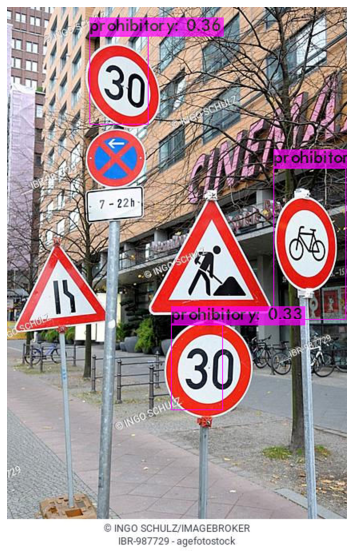

In [ ]:
# run your custom detector with this command (upload an image to your google drive to test, thresh flag sets accuracy that detection must be in order to show it)
!./darknet detector test data/obj.data cfg/yolov3_custom.cfg /mydrive/yolov3/backup/yolov3_custom_final.weights /mydrive/test-images/test_8.jpg -thresh 0.3
imShow('predictions.jpg')